In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn

In [2]:
from IPython.display import Image, display

In [3]:
parser = load_parser()

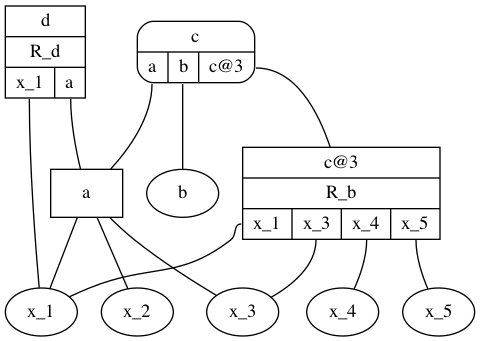

In [4]:
hn = Hypernetwork()

compile_hn(hn, parser, """
    c={a, b}
    a=<x_1, x_2, x_3; R_a>
    c=<x_1, x_3, x_4, x_5; R_b> 
    d=<x_1, a; R_d>
""")

draw_hn(hn, fname="/tmp/data-model-eg", view=False)
Image(filename='/tmp/data-model-eg.png', width=400, height=400)

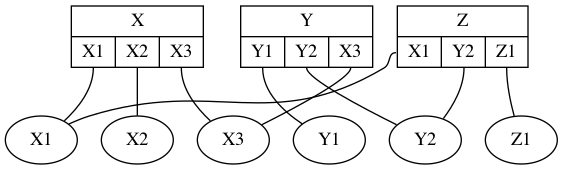

In [7]:
hn = Hypernetwork()

compile_hn(hn, parser, """
    x=<x_1, x_2, x_3>
    y=<y_1, y_2, x_3>
    z=<x_1, y_2, z_1>
""")

lookup = {"x": "X", "y": "Y", "z": "Z",
          "x_1": "X1", "x_2": "X2", "x_3": "X3",
          "y_1": "Y1", "y_2": "Y2",
          "z_1": "Z1"}

draw_hn(hn, fname="/tmp/hn", view=False, lookup=lookup)
Image(filename='/tmp/hn.png', width=400, height=400)

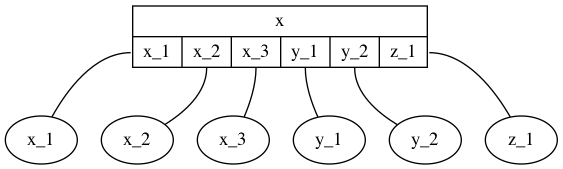

In [6]:
hn = Hypernetwork()

compile_hn(hn, parser, """
    x=U<x_1, x_2, x_3>
    x=U<y_1, y_2, x_3>
    x=U<x_1, y_2, z_1>
""")

draw_hn(hn, fname="/tmp/hn-oo-ht", view=False)
Image(filename='/tmp/hn-oo-ht.png', width=400, height=400)